In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk import word_tokenize
import boto3
from s3 import get_file
import re
import mglearn
import sklearn
import yellowbrick
from nltk.corpus import stopwords

In [7]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [8]:
s3 = boto3.resource('s3')
#lyrics = get_file(s3,'s3ssp',download_file='NLP_Data/master_lyrics_audio_features.csv',rename_file='0320_2020_nlp.csv')

audiofeatures = get_file(s3,'s3ssp',download_file='Analysis_Data/master_audiofeatures_track_uri.csv',rename_file='audiofeatures_0516_2020_nlp.csv')

In [9]:
df = pd.read_csv(audiofeatures,sep='|',encoding='utf-8')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127119050>,
      dtype=object)

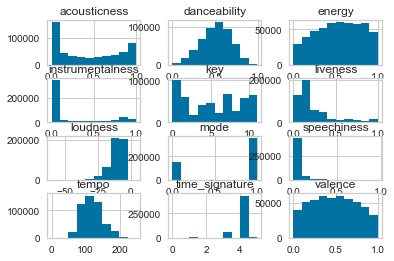

In [10]:
df.hist()

In [11]:
df_playlist = df.copy()
df_playlist = df_playlist[(df_playlist['instrumentalness']<=.95)]
df_playlist.head()
df_playlist.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000,501333.000000
mean,0.513687,0.538558,5.198752,-10.729865,0.702182,0.077887,0.428016,0.203583,0.240643,0.488803,118.764158,3.854332
std,0.170814,0.264619,3.522258,5.406123,0.457300,0.116084,0.361531,0.329383,0.227843,0.263345,30.161797,0.507003
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.396000,0.326000,2.000000,-13.314000,0.000000,0.033600,0.052400,0.000005,0.099700,0.271000,96.064000,4.000000
50%,0.522000,0.549000,5.000000,-9.629000,1.000000,0.042800,0.375000,0.001750,0.137000,0.487000,117.646000,4.000000
75%,0.637000,0.761000,8.000000,-6.886000,1.000000,0.066500,0.793000,0.318000,0.299000,0.704000,137.009000,4.000000
max,0.991000,1.000000,11.000000,4.246000,1.000000,0.969000,0.996000,0.950000,1.000000,1.000000,247.961000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a560610>,
      dtype=object)

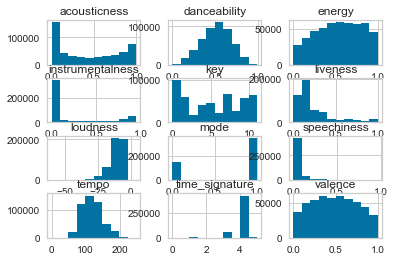

In [12]:
df_playlist.hist()

In [13]:
#Append to Pandas
numpy_train_dataset = np.empty(0, dtype=object, order='C')

In [15]:
%%time
df_ideal_playlist = df_playlist
train = round(501333 * .8)

#Break into chunks
import random
i = 0
master_ideal_track_audiofeatures=[]


#Convert df into numpy
list_track_uri = df_ideal_playlist['track_uri'].to_numpy(dtype=object, copy=True)




#Cycle - is how many times around the loop
cycle = train

#test = 1000
for x in range(train):
    #Split list_track_uri into chunks by cycle amount
    numpy_ideal_playlist = np.random.choice(list_track_uri, size=(20), replace=False)
    for track in numpy_ideal_playlist:
        master_ideal_track_audiofeatures.append({'playlist':f'playlist{x}','track_uri':track})

KeyboardInterrupt: 

In [16]:
df_only_tracks = pd.DataFrame(master_ideal_track_audiofeatures)#.drop_duplicates([0]).describe()

In [19]:
df_merge_training = df_only_tracks.merge(df,left_on='track_uri',right_on='track_uri')

In [20]:
df_merge_training.to_csv('Data/datatraining_dataset.csv',sep='|',index=False)

In [30]:
df_agg_training = df_merge_training.groupby('playlist').median()

In [35]:
df_agg_training.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,108631.000000,108631.000000,108631.000000,108631.000000,108631.000000,108631.000000,108631.000000,108631.000000,108631.000000,108631.000000,108631.000000,108631.000000
mean,0.520573,0.549148,5.281526,-9.714826,0.968582,0.044004,0.385535,0.017714,0.148241,0.485673,117.116976,3.999926
std,0.048568,0.089372,1.374236,1.293126,0.152272,0.006287,0.172207,0.051014,0.038411,0.089510,8.249773,0.007115
min,0.290500,0.198000,0.500000,-16.282500,0.000000,0.029100,0.004250,0.000000,0.082400,0.154000,81.697500,3.000000
25%,0.488500,0.488000,4.500000,-10.539500,1.000000,0.039650,0.252000,0.000450,0.121000,0.423000,111.655000,4.000000
50%,0.521500,0.549000,5.000000,-9.641000,1.000000,0.042900,0.376500,0.002210,0.137500,0.486500,117.503500,4.000000
75%,0.554000,0.611500,6.500000,-8.808500,1.000000,0.047050,0.510500,0.010657,0.163750,0.547000,122.707750,4.000000
max,0.719000,0.886500,9.500000,-5.397000,1.000000,0.139500,0.944000,0.811000,0.574500,0.835000,157.492500,4.000000


In [34]:
df_agg_training.to_csv('Data/playlist_train_dataset.csv',sep='|',index=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a0d6050>,
      dtype=object)

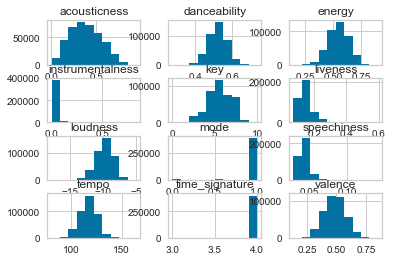

In [145]:
df_agg_training.hist()

## Valence:  (x >= .50 => 176965) ,  (x >= .52  =>  142684), (x >= .60 => 41709)
## Energy:  (x >= .50 => 143239)  , (x >= .60  =>  66969) ,    (x >= .70 => 11272)
## Dance:    (x >= .50 => 115251) ,  (x >= .55  =>  23194) , (x >= .60 => 357)
## Acoustic:  (x >= .10 => 110334) ,  (x >= .20  =>  15501) ,  (x >= .30 => 72)

In [263]:
#   7% of data = Ideal mark up Moderate-High on Valence, Moderate-High on Energy, Low on Dance, Low on Acoustic

df_training = df_agg_training[(df_agg_training['valence']>=.55) & (df_agg_training['energy']>=.60) 
                              & (df_agg_training['danceability']>=.50) & (df_agg_training['acousticness']>=.10)
                             ]

In [262]:
df_training.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,31608.000000,31608.000000,31608.000000,31608.000000,31608.000000,31608.000000,31608.000000,31608.000000,31608.000000,31608.000000,31608.000000,31608.0
mean,0.556834,0.654966,5.343995,-8.772425,0.970182,0.045694,0.286953,0.010103,0.154483,0.609502,118.580159,4.0
std,0.034569,0.041585,1.367209,0.972209,0.148195,0.006814,0.121599,0.033746,0.041606,0.045394,7.603216,0.0
min,0.500000,0.600000,0.000000,-13.937000,0.000000,0.030950,0.100000,0.000000,0.081600,0.550000,88.472500,4.0
25%,0.530000,0.622000,4.500000,-9.408125,1.000000,0.040950,0.191000,0.000261,0.124500,0.573000,113.656375,4.0
50%,0.553500,0.646500,5.000000,-8.725750,1.000000,0.044500,0.270000,0.001206,0.144000,0.600000,119.000000,4.0
75%,0.579500,0.679500,6.500000,-8.096000,1.000000,0.049100,0.364500,0.005600,0.173000,0.636500,123.651000,4.0
max,0.711000,0.868500,9.500000,-5.403000,1.000000,0.129500,0.804000,0.743500,0.466000,0.853000,150.433500,4.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139535f90>,
      dtype=object)

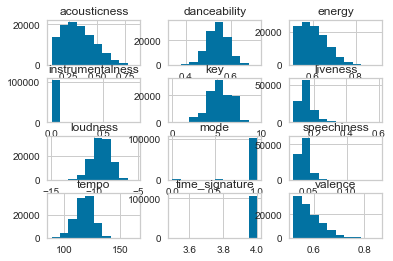

In [142]:
df_training.hist()